In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.stats import mode 
pd.set_option('display.max_rows', 300)

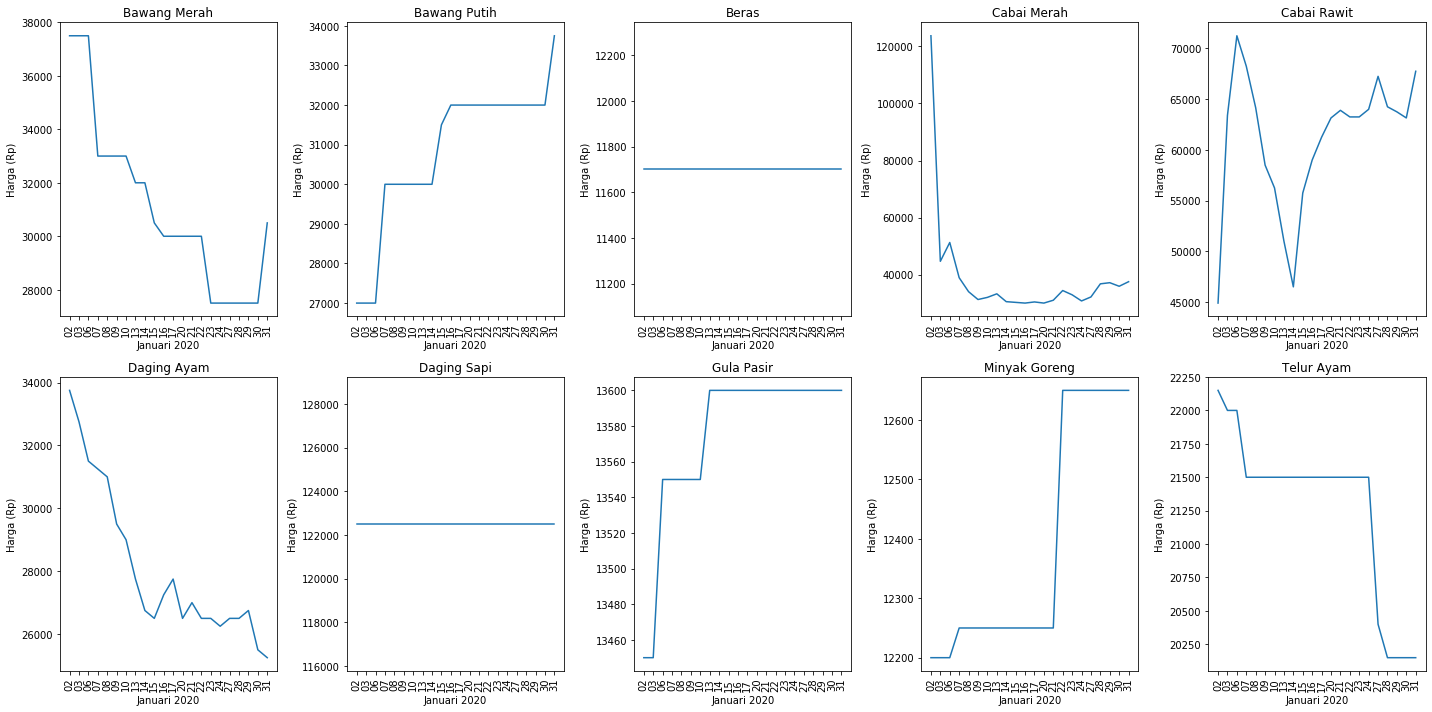

In [226]:

df = pd.read_csv('jan_2020.csv')
df = df.drop(columns='Unnamed: 0')
df.rename(columns={'Komoditas(Rp)' : 'Komoditas'}, inplace=True)
#print(df.columns)

df_melt = pd.melt(frame=df, id_vars=['Komoditas'], var_name="Tanggal", value_name='Harga')
df_melt=df_melt.sort_values(by=['Komoditas', 'Tanggal']).reset_index(drop=True)
#print(df_melt)
df_pivot = df_melt.pivot(columns='Komoditas', index='Tanggal', values='Harga').reset_index()
df_pivot['Hari'] = df_pivot.Tanggal.str.split('/', expand=True)[0]
#print(df_pivot)

list_ax = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    list_ax[i] = plt.subplot(2, 5, i)
    plt.plot(range(len(df_pivot)), df_pivot[columns_df[i]])
    list_ax[i].set_xticks(range(len(df_pivot)))
    list_ax[i].set_xticklabels(df_pivot['Hari'])
    plt.ylabel('Harga (Rp)')
    plt.title(columns_df[i])
    plt.xticks(rotation=90)
    plt.xlabel('Januari 2020')
plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
plt.tight_layout()
plt.savefig('tes.png')
plt.show()

In [227]:
#Agregat
df_mean = df_melt.groupby('Komoditas').Harga.mean().round(2).reset_index()
df_mean.rename(columns={'Harga': 'Mean'}, inplace=True)
df_median = df_melt.groupby('Komoditas').Harga.median().reset_index()
df_median.rename(columns={'Harga': 'Median'}, inplace=True)
#df_mode = df_melt.groupby('Komoditas').apply(lambda x: mode(x)[0][0]).reset_index()
#df_mode.rename(columns={'Harga': 'Mode'}, inplace=True)
df_std = df_melt.groupby('Komoditas').Harga.std().round(2).reset_index()
df_std.rename(columns={'Harga': 'STD'}, inplace=True)
df_max = df_melt.groupby('Komoditas').Harga.max().reset_index()
df_max.rename(columns={'Harga': 'Max'}, inplace=True)
df_min = df_melt.groupby('Komoditas').Harga.min().reset_index()
df_min.rename(columns={'Harga': 'Min'}, inplace=True)
#df_agregat = df_melt.groupby('Komoditas').Harga.mean().reset_index()
all_df_aggregate = df_mean.merge(df_median).merge(df_std).merge(df_max).merge(df_min)
all_df_aggregate['No.'] = range(1, len(all_df_aggregate)+1)
all_df_aggregate = all_df_aggregate[['No.', 'Komoditas', 'Mean', 'Median', 'Max', 'Min', 'STD']]
all_df_aggregate

,No.,Komoditas,Mean,Median,Max,Min,STD
0,1,Bawang Merah,31113.64,30250,37500,27500,3262.09
1,2,Bawang Putih,30829.55,32000,33750,27000,1853.87
2,3,Beras,11700.00,11700,11700,11700,0.00
3,4,Cabai Merah,38577.27,33075,123750,30000,19724.56
4,5,Cabai Rawit,61086.36,63250,71250,44900,6699.58
5,6,Daging Ayam,28090.91,26875,33750,25250,2446.51
6,7,Daging Sapi,122500.00,122500,122500,122500,0.00
7,8,Gula Pasir,13575.00,13600,13600,13450,45.64
8,9,Minyak Goreng,12388.64,12250,12650,12200,202.91
9,10,Telur Ayam,21279.55,21500,22150,20150,630.69


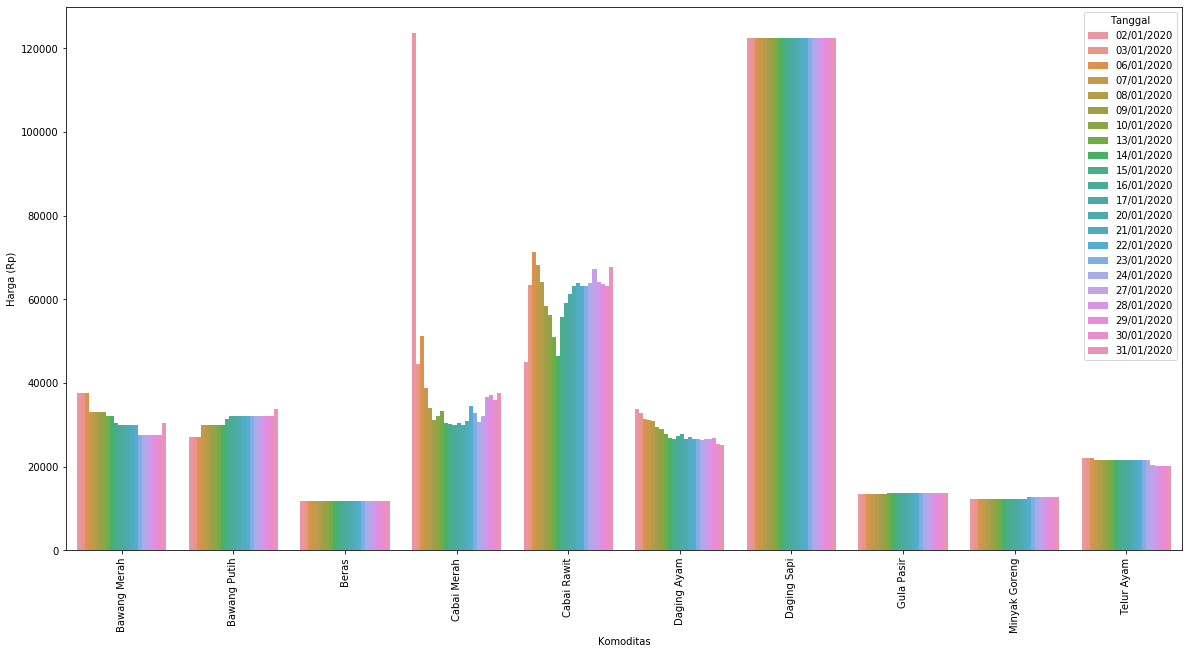

In [228]:
#bar
f, ax = plt.subplots(figsize=(20, 10)) 
ax = sns.barplot(data=df_melt, x='Komoditas', y='Harga', hue='Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Harga (Rp)')
plt.savefig('Bar.png')
plt.show()

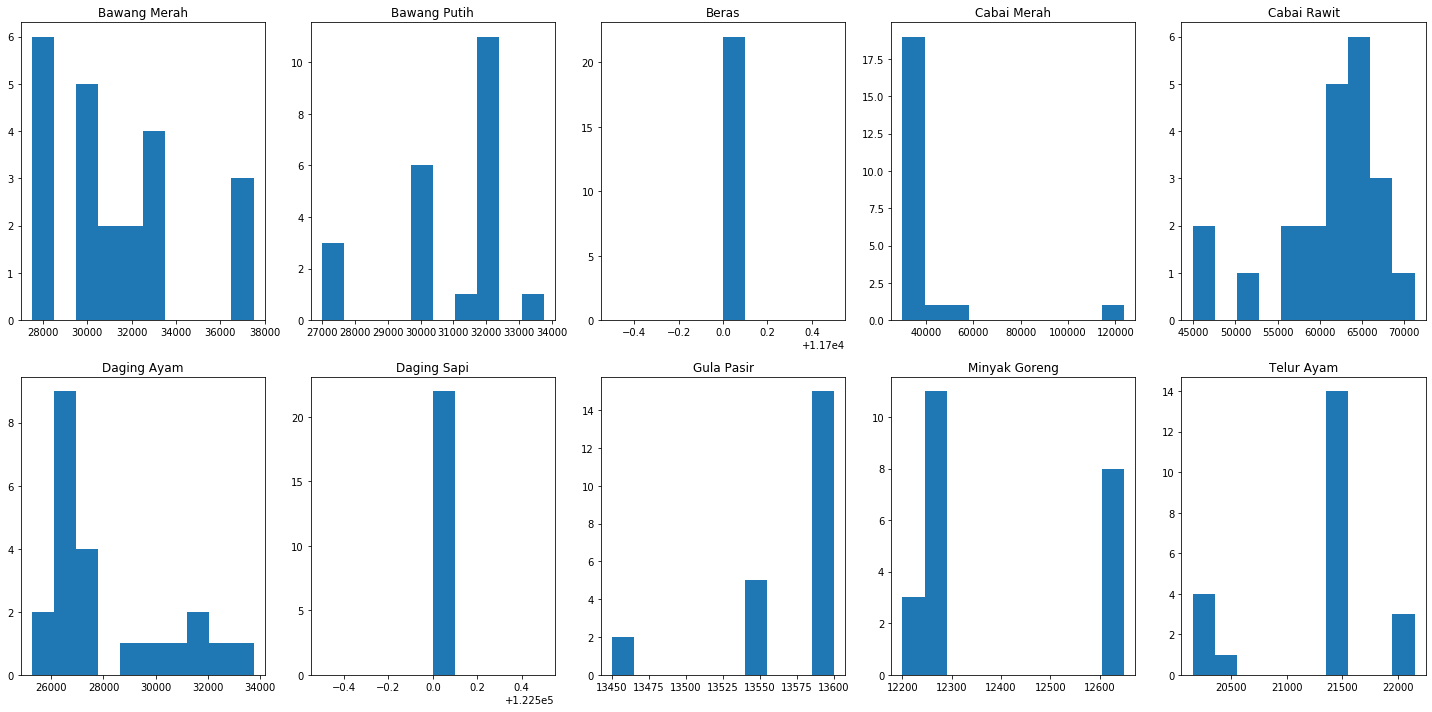

In [229]:
#histogram


list_ax2 = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df2 = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    list_ax2[i] = plt.subplot(2, 5, i)
    plt.hist(df_pivot[columns_df2[i]])#, bins=range(len(df_pivot['Bawang Merah'])))
    #list_ax[i].set_xticks(range(len(df_pivot)))
    #list_ax[i].set_xticklabels(df_pivot['Hari'])
    plt.title(columns_df2[i])
    #plt.xticks(rotation=90)
    
plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
plt.tight_layout()
plt.savefig('tes2.png')
plt.show()

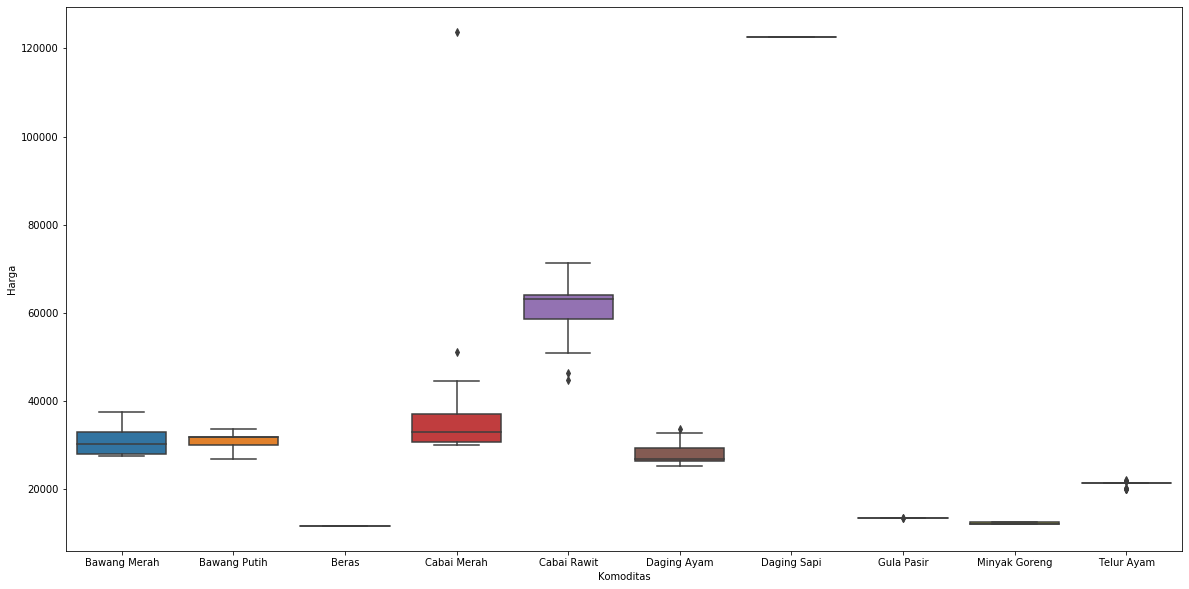

In [230]:
#Boxplot
plt.figure(figsize=(20, 10))
ax = plt.subplot()
sns.boxplot(data=df_melt, x='Komoditas', y='Harga')
plt.show()